In [109]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [110]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [111]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [112]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [113]:
# reflect an existing database into a new model
Base = automap_base()

In [114]:
# reflect the tables
Base.prepare(autoload_with=engine)

In [115]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [116]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [117]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [118]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [119]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > '2016-08-22').\
order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
column_names = ['date', 'prcp'] 
last_12prcp = pd.DataFrame(data, columns = column_names)
last_12prcp.head()
# Sort the dataframe by date


,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


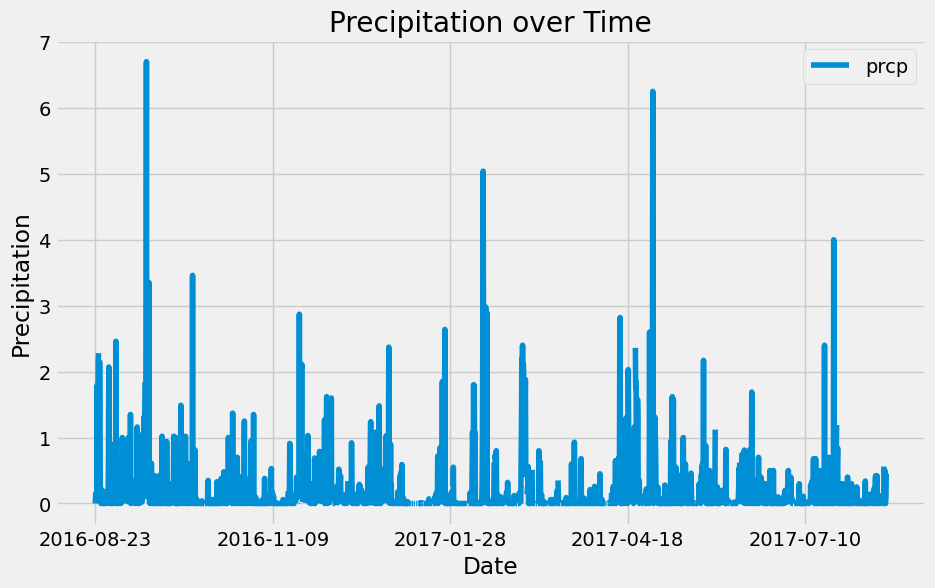

In [120]:
# Use Pandas Plotting with Matplotlib to plot the data
last_12prcp.plot(x='date',y='prcp',kind = 'line', figsize =(10,6))
# Labels
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation over Time')
#Display the plot
plt.show()

In [121]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = last_12prcp['prcp'].describe()
print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [122]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
total_stations

9

In [123]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_activity_first = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
station_activity_first

('USC00519281', 2772)

In [124]:
 most_act= list(np.ravel(most_active_station))
most_act

['USC00519281']

In [125]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_activity_first[0]
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()
temperature_stats

[(54.0, 85.0, 71.66378066378067)]

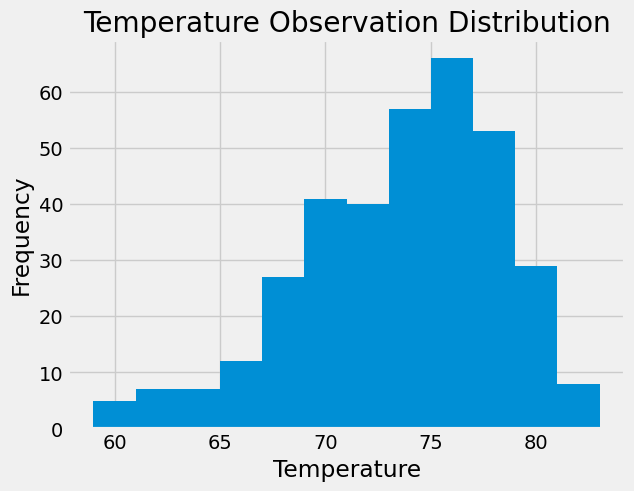

In [126]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= '2016-08-23').all()

temperatures = [temp[0] for temp in temperature_data]

# Plotting the histogram
plt.hist(temperatures, bins=12)

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observation Distribution')

# Display the plot
plt.show()

# Close Session

In [90]:
# Close Session
session.close()